# Import Libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import json
import folium
from folium.plugins import MarkerCluster


# Prepare Dataset

In [3]:
df = pd.read_excel("data\covid19_vn.xlsx")
df

,Tỉnh,Tổng số ca lây nhiễm,Số ca lây nhiễm mới,Tổng số ca tử vong,Ngày
0,Hồ Chí Minh,112215.0,2563,2105.0,2021-06-08 00:00:00
1,Bình Dương,22689.0,322,144.0,2021-06-08 00:00:00
2,Long An,8451.0,286,84.0,2021-06-08 00:00:00
3,Đồng Nai,6347.0,207,39.0,2021-06-08 00:00:00
4,Bắc Giang,5820.0,0,13.0,2021-06-08 00:00:00
...,...,...,...,...,...
1433,Yên Bái,7.0,0,0.0,08-29-2021
1434,Bắc Kạn,7.0,0,0.0,08-29-2021
1435,Lai Châu,2.0,0,0.0,08-29-2021
1436,Tuyên Quang,2.0,0,0.0,08-29-2021


Xem xét data cover được từ thời gian nào đến thời gian nào

In [4]:
df["Ngày"] = pd.to_datetime(df["Ngày"])
str(df["Ngày"].min()), str(df["Ngày"].max())

('2021-06-08 00:00:00', '2021-12-08 00:00:00')

In [5]:
df.drop(columns=["Ngày", "Số ca lây nhiễm mới"], inplace=True)

In [6]:
df.isna().sum(), df.isnull().sum()

(Tỉnh                    0
 Tổng số ca lây nhiễm    0
 Tổng số ca tử vong      0
 dtype: int64,
 Tỉnh                    0
 Tổng số ca lây nhiễm    0
 Tổng số ca tử vong      0
 dtype: int64)

In [7]:
df = df.groupby("Tỉnh", as_index=False).agg({
    "Tổng số ca lây nhiễm": "sum",
    "Tổng số ca tử vong": "sum"
})

In [8]:
df = df.rename(columns={
    "Tỉnh": "Province",
    "Tổng số ca lây nhiễm": "Total",
    "Tổng số ca tử vong": "Death"
})
df

,Province,Total,Death
0,An Giang,24117.00,34.0
1,Bà Rịa - Vũng Tàu,63476.00,521.0
2,Bình Dương,1248714.00,9832.0
3,Bình Phước,7453.00,18.0
4,Bình Thuận,35704.00,264.0
...,...,...,...
58,Đà Nẵng,68316.00,1038.0
59,Đắk Lắk,11872.00,40.0
60,Đắk Nông,4590.00,0.0
61,Đồng Nai,332998.00,2463.0


In [9]:
df["Death%"] = df.apply(lambda row: 0 if row["Total"] == 0 else row["Death"] / row["Total"], axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Province  63 non-null     object 
 1   Total     63 non-null     float64
 2   Death     63 non-null     float64
 3   Death%    63 non-null     float64
dtypes: float64(3), object(1)
memory usage: 2.1+ KB


In [11]:
df["Total"].describe()

count    6.300000e+01
mean     1.085282e+05
std      4.788519e+05
min      0.000000e+00
25%      1.774000e+03
50%      7.552000e+03
75%      3.742550e+04
max      3.615812e+06
Name: Total, dtype: float64

In [12]:
df["Death"].describe()

count        63.000000
mean       2307.306587
std       14601.049187
min           0.000000
25%           0.000000
50%          22.000000
75%         227.000000
max      115814.315000
Name: Death, dtype: float64

In [13]:
df["Death%"].describe()

count    63.000000
mean      0.005467
std       0.007088
min       0.000000
25%       0.000000
50%       0.002152
75%       0.008100
max       0.032030
Name: Death%, dtype: float64

# Clustering

In [14]:
features = ["Total", "Death%"]

In [15]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

## Elbow

In [16]:
inertias = []
max_clusters = 10

for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertias.append(kmeans.inertia_)

d:\anaconda3\envs\nlp_env\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\anaconda3\envs\nlp_env\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\anaconda3\envs\nlp_env\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\anaconda3\envs\nlp_env\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

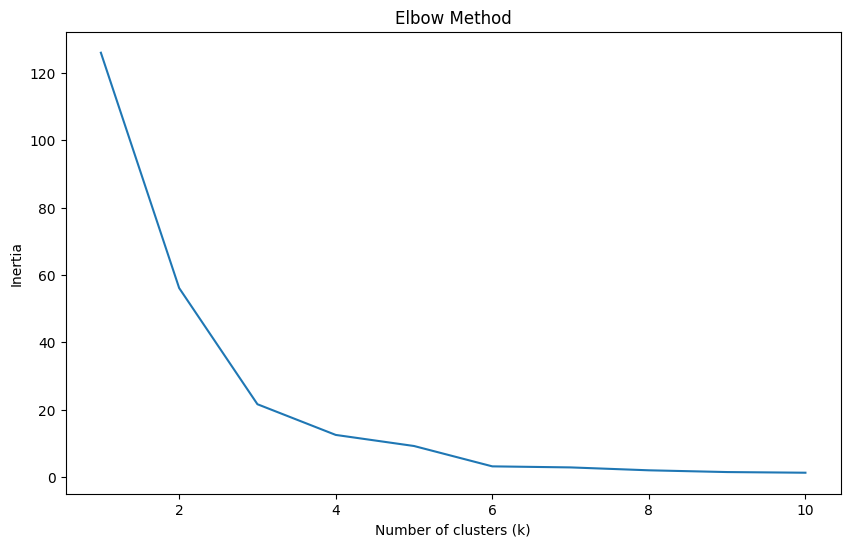

In [17]:
plt.figure(figsize=(10, 6))

plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")

sns.lineplot(x=range(1, max_clusters + 1), y=inertias)

plt.show()

In [18]:
optimal_clusters = 3

## KMean Clustering

In [23]:
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)

df["Zone"] = kmeans.fit_predict(scaled_features)

d:\anaconda3\envs\nlp_env\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


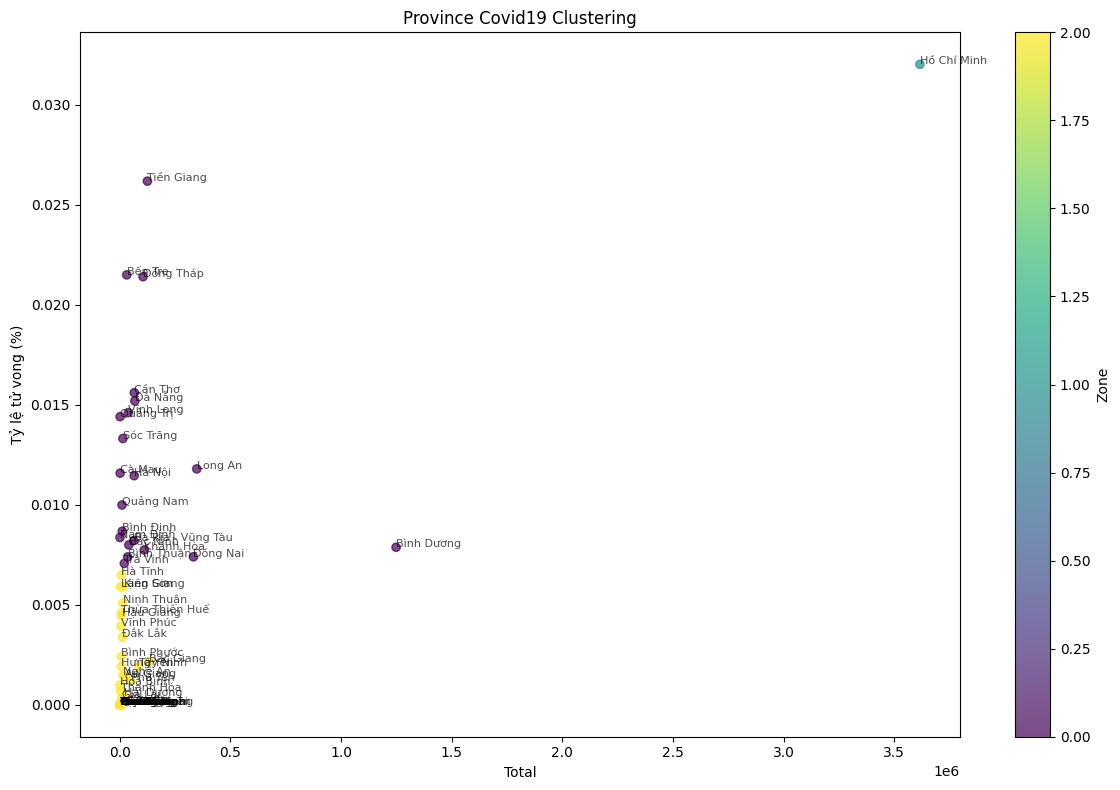

In [24]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df["Total"], df["Death%"], c=df["Zone"], cmap="viridis", alpha=0.7)

plt.xlabel("Total")
plt.ylabel("Tỷ lệ tử vong (%)")
plt.title("Province Covid19 Clustering")

for i, txt in enumerate(df["Province"]):
    plt.annotate(txt, (df["Total"][i], df["Death%"][i]), fontsize=8, alpha=0.7)

plt.colorbar(scatter, label="Zone")
plt.tight_layout()
plt.show()

Look at the chart, we can see that 1 is red zone(dangerous), 0 is orange zone(quite dangerous), 2 is green zone(safe)

In [25]:
df["Zone"] = df["Zone"].map({0: "orange", 1: "red", 2: "green"})
df

,Province,Total,Death,Death%,Zone
0,An Giang,24117.00,34.0,0.001410,green
1,Bà Rịa - Vũng Tàu,63476.00,521.0,0.008208,orange
2,Bình Dương,1248714.00,9832.0,0.007874,orange
3,Bình Phước,7453.00,18.0,0.002415,green
4,Bình Thuận,35704.00,264.0,0.007394,orange
...,...,...,...,...,...
58,Đà Nẵng,68316.00,1038.0,0.015194,orange
59,Đắk Lắk,11872.00,40.0,0.003369,green
60,Đắk Nông,4590.00,0.0,0.000000,green
61,Đồng Nai,332998.00,2463.0,0.007396,orange


# Data Visualization

In [27]:
fh = open('data/coordinates.json')
coordinates = json.load(fh)

In [28]:
df['Latitude'] = df['Province'].map(lambda x: coordinates.get(x, [0, 0])[0])
df['Longitude'] = df['Province'].map(lambda x: coordinates.get(x, [0, 0])[1])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Province   63 non-null     object 
 1   Total      63 non-null     float64
 2   Death      63 non-null     float64
 3   Death%     63 non-null     float64
 4   Zone       63 non-null     object 
 5   Latitude   63 non-null     float64
 6   Longitude  63 non-null     float64
dtypes: float64(5), object(2)
memory usage: 3.6+ KB


## Visualize map

In [30]:
vietnam_map = folium.Map(location=[16.0, 106.0], zoom_start=6)
for index, row in df.iterrows():
    province = row['Province']
    zone = row['Zone']
    lat, lon = row['Latitude'], row['Longitude']
    
    folium.Marker(
        location=[lat, lon],
        popup=f'{province} - Zone: {zone}',
        icon = folium.Icon(color = zone)
    ).add_to(vietnam_map)

vietnam_map